<h1>Q3.2 Variational Inference</h1>

In [27]:
from math import exp
import numpy as np
import pandas as pd
import seaborn as sns

class VariationalInference:
    def __init__(self, beta : float):
        self.beta = beta
        self.mu = np.random.rand(10,10)
        self.mu /= np.sum(self.mu)
        self.epsilon = 1e-8

    def coord_ascent(self):
        while True:
            mu_copy = self.mu.copy()
            for i in range(10):
                for j in range(10):
                    s = 0
                    s = s if j == 0 else s + (2 * mu_copy[i][j-1] - 1)
                    s = s if j == 9 else s + (2 * mu_copy[i][j+1] - 1)
                    s = s if i == 0 else s + (2 * mu_copy[i-1][j] - 1)
                    s = s if i == 9 else s + (2 * mu_copy[i+1][j] - 1)
                    # print(f"i:{i}, j:{j}, s: {s}")
        
                    s *= self.beta
                    s *= -1
        
                    self.mu[i][j] = 1 / (1 + exp(s))
            # self.mu /= np.sum(self.mu)
            if self.has_converged(mu_copy, self.mu):
                break
            

    def compute_joint(self):
        prob_table = np.zeros((2,2))
        prob_table[0][0] = (1 - self.mu[0][9]) * (1 - self.mu[9][9])
        prob_table[0][1] = (1 - self.mu[0][9]) * self.mu[9][9]
        prob_table[1][0] = self.mu[0][9] * (1 - self.mu[9][9])
        prob_table[1][1] = self.mu[0][9] * self.mu[9][9]
        prob_table /= np.sum(prob_table)
        
        self.prob_table = prob_table
        print("probability table:")
        print(pd.DataFrame(prob_table))

    def plot_mu(self):
        sns.heatmap(np.round(self.mu, 5), linewidths=0.5)

    def has_converged(self, mu_copy, mu):
        avg_diff = np.sum(abs(mu_copy - mu)) / 100
        return avg_diff < self.epsilon

    def run(self):
        self.coord_ascent()
        self.compute_joint()
        self.plot_mu()

In [29]:
cavi_4 = VariationalInference(4)
cavi_1 = VariationalInference(1)
cavi_001 = VariationalInference(0.01)

probability table:
          0             1
0  0.999329  3.352707e-04
1  0.000335  1.124819e-07


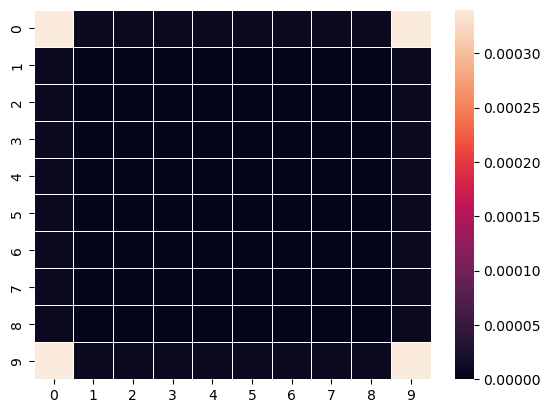

In [31]:
cavi_4.run()

probability table:
          0         1
0  0.714738  0.130684
1  0.130684  0.023895


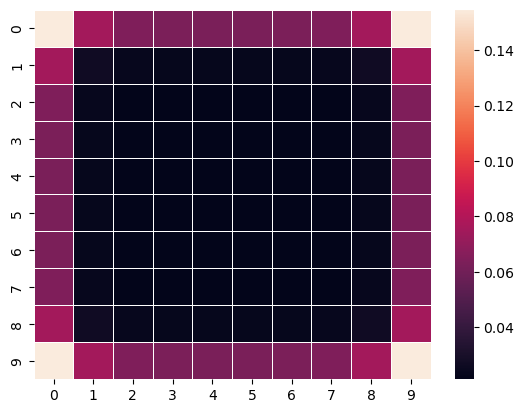

In [33]:
cavi_1.run()

probability table:
      0     1
0  0.25  0.25
1  0.25  0.25


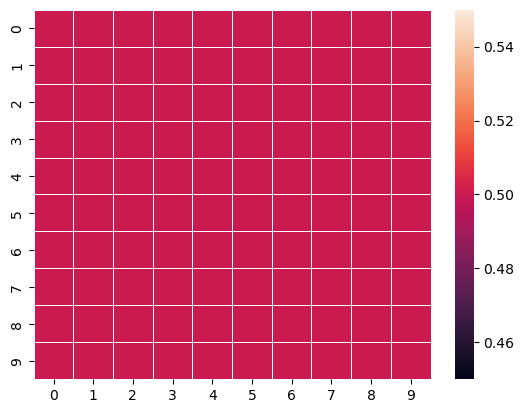

In [35]:
cavi_001.run()

In [15]:
cavi_001.mu[0][0], cavi_001.mu[4][4]

(0.4999999999946504, 0.4999999999688701)